In [48]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

https://stackoverflow.com/questions/78304501/calculating-the-area-under-a-curve-confining-to-a-region-and-without-knowing-the?noredirect=1#comment138052333_78304501

In [32]:
def load(file):
    with open(file, "r") as handler:
        raw = handler.readlines()[24:]
    data = pd.read_fwf(io.StringIO("".join(raw)), header=None, names=["x", "y"])
    return data

In [33]:
pol = load("pol_2000.xvg")
sol = load("sol_2000.xvg")

In [47]:
idx = np.argwhere(np.diff(np.sign(sol.y - pol.y))).flatten()
sel = slice(idx[0], idx[1] + 1)

In [55]:
xl = sol.x[idx]
xl

15      0.839916
239    12.978100
Name: x, dtype: float64

In [56]:
I = integrate.simpson(sol.y[sel], x=sol.x[sel])
I

3026.198371039349

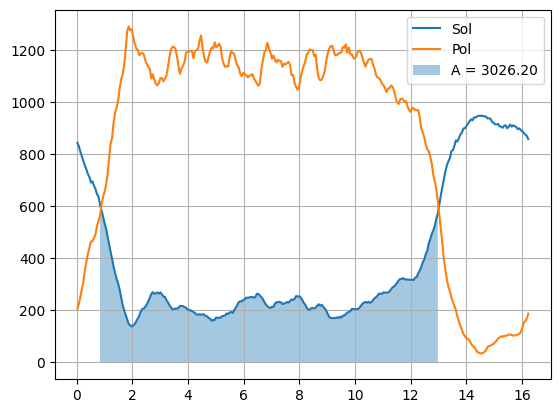

In [53]:
fig, axe = plt.subplots()
axe.plot(sol.x, sol.y, label="Sol")
axe.plot(pol.x, pol.y, label="Pol")
axe.fill_between(sol.x[sel], sol.y[sel], alpha=0.4, label="A = %.2f" % I)
axe.legend()
axe.grid()